In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import numpy as np
import pandas as pd

from random import random, uniform
from io import StringIO

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.lib.pretty import pretty

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
datastr = StringIO("""
Line	Label	Ingredients	Berries	Speciatly	BaseHelp	Use
Pichu	08/08 Pichu 3	1	8	B	2.5222	1
Squirtle	08/09 Squirtle 1	3	4	I	2.4000	1
Raichu	08/11 Raichu 12	3	19	B	5.5788	1
Houndour	08/11 Houndour 7	1	7	B	2.0281	1
Mankey	08/11 Mankey 10	1	9	B	2.6188	1
Ivysaur	08/11 Ivysaur 13	4	6	I	3.3540	1
Ivysaur	08/14 Ivysaur 12	4	6	I	3.8916	1
Dugtrio	08/14 Dugtrio 11	4	8	I	4.3732	1
Wartortle	08/14 Wartortle 12	5	6	I	3.7769	1
Larvitar	08/14 Larvitar 7	2	4	I	2.2775	1
Charmander	08/14 Charmander 9	3	6	I	3.4843	1
Ivysaur	08/15 Ivysaur 12	4	6	I	3.8916	1
Dugtrio	08/15 Dugtrio 12	4	8	I	4.3828	1
Wartortle	08/15 Wartortle 12	5	6	I	3.7769	1
Gastly	08/15 Gastly 7	2	5	I	2.8769	1
Larvitar	08/15 Larvitar 7	2	4	I	2.2775	1
Squirtle	08/14 Squirtle 10	3	4	I	2.4440	1
Squirtle	08/15 Squirtle 10	3	4	I	2.4440	1
Butterfree	08/15 Butterfree 10	2	15	B	4.2303	1
Wigglytuff	08/17 Wigglytuff 13	1	7	S	3.7305	1
Pikachu	08/17 Pikachu 13	2	15	B	4.5541	1
Riolu	08/21 Riolu 6	1	5	S	2.5974	1
Geodude	08/21 Geodude 4	2	3	I	1.9064	1
Bellsprout	08/21 Bellsprout 7	2	4	I	2.1024	1
Eevee	08/21 Eevee 4	1	6	S	3.2635	1
Charmeleon	08/21 Charmeleon 12	5	8	I	4.7558	1
""")

data = pd.read_csv(datastr, sep='\t', header=0)
data = data.set_index (["Line","Label"])
data.sort_index(axis=0, ascending=True, inplace=True)
data.head(30)

Ingredients  Berries Speciatly  BaseHelp  Use
Line       Label                                                             
Bellsprout 08/21 Bellsprout 7             2        4         I    2.1024    1
Butterfree 08/15 Butterfree 10            2       15         B    4.2303    1
Charmander 08/14 Charmander 9             3        6         I    3.4843    1
Charmeleon 08/21 Charmeleon 12            5        8         I    4.7558    1
Dugtrio    08/14 Dugtrio 11               4        8         I    4.3732    1
           08/15 Dugtrio 12               4        8         I    4.3828    1
Eevee      08/21 Eevee 4                  1        6         S    3.2635    1
Gastly     08/15 Gastly 7                 2        5         I    2.8769    1
Geodude    08/21 Geodude 4                2        3         I    1.9064    1
Houndour   08/11 Houndour 7               1        7         B    2.0281    1
Ivysaur    08/11 Ivysaur 13               4        6         I    3.3540    1
           08/14 Ivysaur 12               4        6         I    3.8916    1
           08/15 Ivysaur 12               4        6         I    3.8916    1
Larvitar   08/14 Larvitar 7               2        4         I    2.2775    1
           08/15 Larvitar 7               2        4         I    2.2775    1
Mankey     08/11 Mankey 10                1        9         B    2.6188    1
Pichu      08/08 Pichu 3                  1        8         B    2.5222    1
Pikachu    08/17 Pikachu 13               2       15         B    4.5541    1
Raichu     08/11 Raichu 12                3       19         B    5.5788    1
Riolu      08/21 Riolu 6                  1        5         S    2.5974    1
Squirtle   08/09 Squirtle 1               3        4         I    2.4000    1
           08/14 Squirtle 10              3        4         I    2.4440    1
           08/15 Squirtle 10              3        4         I    2.4440    1
Wartortle  08/14 Wartortle 12             5        6         I    3.7769    1
           08/15 Wartortle 12             5        6         I    3.7769    1
Wigglytuff 08/17 Wigglytuff 13            1        7         S    3.7305    1

In [3]:
def validate(item, ingredient_fraction, energy_m):
    berryBonus = 2 if item["Speciatly"] == 'B' else 1
    ingBonus = 2 if item["Speciatly"] == 'I' else 1

    ing = int(round(item["BaseHelp"]*energy_m*ingredient_fraction*ingBonus))
    ber = int(round(item["BaseHelp"]*energy_m*(1-ingredient_fraction)*berryBonus))

    return 1.0 if ing == int(item["Ingredients"]) and ber == int(item["Berries"]) else 0.0
    

In [4]:

recompute = False
nb_samples = 200000

if recompute:

    # extract unique evolution lines
    species = list(data.index.get_level_values(0).unique())
    
    # reshape the data once so we don't have to repeat the filter query for each random sample.
    obs_by_spec = dict(
        [ (name, list(map(lambda x:  x._asdict(), data.loc[name].itertuples() )))  for name in species ]
    ) 
    
    
    
    # setup storage, list are much faster to grow than dataframe.
    rnd_trials_list = []
    rnd_params_list = []

    for index_trial in range(0,nb_samples):

        ingredient_fraction = uniform(0, 0.4)
        energy_m = uniform(2.0, 2.5)

        results = []

        for sp in species:
            
            obs = obs_by_spec[sp]
            res = 1

            for item in obs:
                
                res *= validate(item, ingredient_fraction, energy_m)
                if(res == 0): 
                    break;

            results.append(res)
 
        if(sum(results) == 0): 
            continue

        rnd_trials_list.append(results)
        rnd_params_list.append([ingredient_fraction,energy_m])

        
    #convert list to dataframe
    rnd_trials = pd.DataFrame(rnd_trials_list, columns = species)
    rnd_params = pd.DataFrame(rnd_params_list, columns = ["ingredient%","energy_m"])
    

    rnd_params.to_pickle('./saved/rnd_params.pickle')
    rnd_trials.to_pickle('./saved/rnd_trials.pickle')
    

else:
    
    rnd_params = pd.read_pickle('./saved/rnd_params.pickle')
    rnd_trials = pd.read_pickle('./saved/rnd_trials.pickle')

In [5]:
rnd_trials.describe()
rnd_params.describe()

,Bellsprout,Butterfree,Charmander,Charmeleon,Dugtrio,Eevee,Gastly,Geodude,Houndour,Ivysaur,Larvitar,Mankey,Pichu,Pikachu,Raichu,Riolu,Squirtle,Wartortle,Wigglytuff
count,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.00000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000,112049.000000
mean,0.332622,0.112067,0.163446,0.088649,0.100295,0.332542,0.189569,0.388598,0.426688,0.006979,0.354274,0.23222,0.153290,0.089738,0.063660,0.495685,0.286785,0.137270,0.265161
std,0.471155,0.315450,0.369774,0.284237,0.300395,0.471126,0.391962,0.487434,0.494598,0.083249,0.478295,0.42225,0.360268,0.285807,0.244147,0.499984,0.452262,0.344134,0.441421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ingredient%,energy_m
count,112049.000000,112049.000000
mean,0.201937,2.228626
std,0.067760,0.138341
min,0.062561,2.000017
25%,0.146995,2.110494
50%,0.203055,2.221840
75%,0.259609,2.341676
max,0.332991,2.499998


In [6]:
# Here we enforce that energy_m is shared by all mons.

energy_m_mins = []
energy_m_maxs = []
    
    
for col in rnd_trials.columns:
    
    values = rnd_params["energy_m"].loc[rnd_trials[col]==1]
    energy_m_mins.append(values.min())
    energy_m_maxs.append(values.max())
    
low = max(energy_m_mins)
high = min(energy_m_maxs)

valid = rnd_params["energy_m"].between(low, high)

rnd_trials = rnd_trials.loc[valid]
rnd_params = rnd_params.loc[valid]


# Here we check for range on the ing%



In [7]:
rnd_trials.describe()
rnd_params.describe()

,Bellsprout,Butterfree,Charmander,Charmeleon,Dugtrio,Eevee,Gastly,Geodude,Houndour,Ivysaur,Larvitar,Mankey,Pichu,Pikachu,Raichu,Riolu,Squirtle,Wartortle,Wigglytuff
count,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000,20557.000000
mean,0.341003,0.213942,0.259474,0.192732,0.162280,0.451379,0.258403,0.479058,0.456633,0.037992,0.404874,0.321934,0.138201,0.081043,0.153573,0.516175,0.359002,0.236708,0.383616
std,0.474058,0.410096,0.438357,0.394454,0.368717,0.497642,0.437768,0.499573,0.498128,0.191181,0.490880,0.467229,0.345119,0.272908,0.360548,0.499750,0.479719,0.425072,0.486278
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ingredient%,energy_m
count,20557.000000,20557.000000
mean,0.205773,2.205272
std,0.071216,0.024326
min,0.071498,2.163876
25%,0.144393,2.183886
50%,0.206056,2.205126
75%,0.267130,2.226331
max,0.332991,2.247483


In [8]:
def get_valid_params(cols):

    df = rnd_trials[cols].copy()
    df = df.loc[(df!=0).all(axis=1)]
    return rnd_params.loc[df.index]


In [9]:
def plot_group(cols, samples=None):
    
    if(samples is None):
        samples = get_valid_params(cols)
    
    # Standard scale to compare cluster.
    
    fig, ax = plt.subplots()
    sns.scatterplot(data=samples,y="energy_m", x="ingredient%", alpha=0.8, ax=ax)
    plt.xlabel("Ingredient %",fontweight ='bold', size=14)
    plt.ylabel("Production Boost (M)", fontweight ='bold',size=14)
    plt.title(" ".join(cols))
    ax.set_xlim(0, 0.35)
    ax.set_ylim(2.1, 2.3)
    
    display(fig)
    plt.close()
    


,ingredient%,energy_m
count,7010.000000,7010.000000
mean,0.203891,2.208779
std,0.024960,0.024060
min,0.159153,2.163898
25%,0.182379,2.188190
50%,0.203528,2.210634
75%,0.224584,2.229853
max,0.259070,2.247483


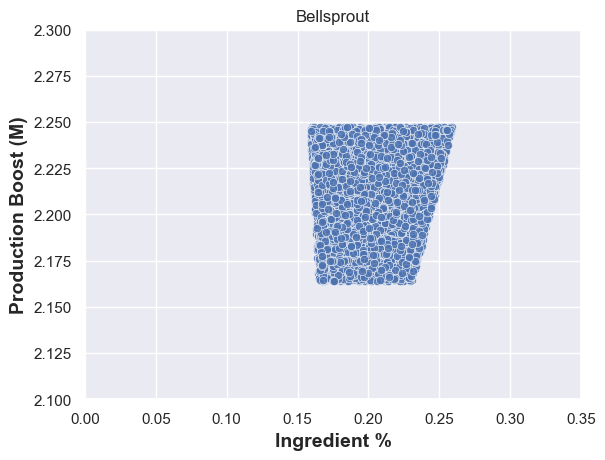

,ingredient%,energy_m
count,4398.000000,4398.000000
mean,0.197079,2.206352
std,0.017018,0.023956
min,0.162557,2.163898
25%,0.183605,2.185579
50%,0.196818,2.206718
75%,0.210014,2.226832
max,0.236722,2.247452


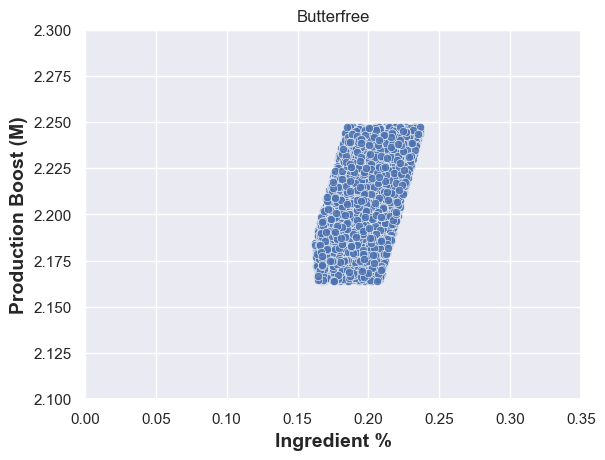

,ingredient%,energy_m
count,5334.000000,5334.000000
mean,0.195803,2.204658
std,0.018559,0.023982
min,0.161621,2.163888
25%,0.179807,2.183592
50%,0.195937,2.204614
75%,0.211583,2.224974
max,0.231365,2.247452


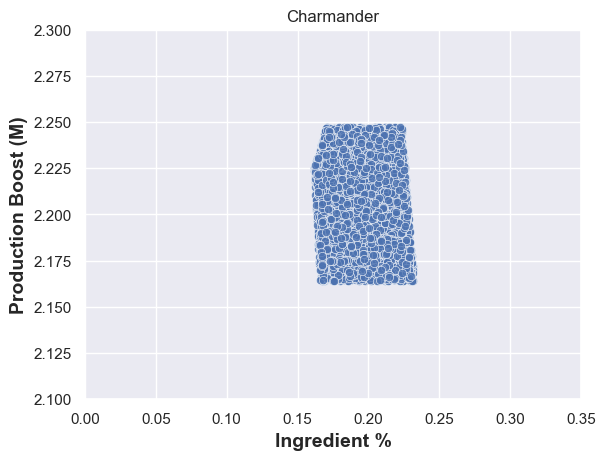

,ingredient%,energy_m
count,3962.000000,3962.000000
mean,0.238481,2.206141
std,0.014016,0.024186
min,0.210782,2.163876
25%,0.226433,2.185160
50%,0.238541,2.206753
75%,0.250270,2.227120
max,0.267043,2.247483


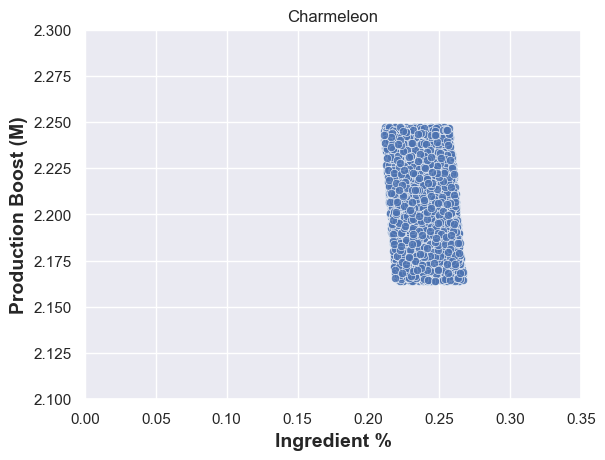

,ingredient%,energy_m
count,3336.000000,3336.000000
mean,0.202346,2.211332
std,0.012587,0.023275
min,0.178402,2.163898
25%,0.191933,2.192761
50%,0.201780,2.213871
75%,0.212002,2.231255
max,0.230051,2.247452


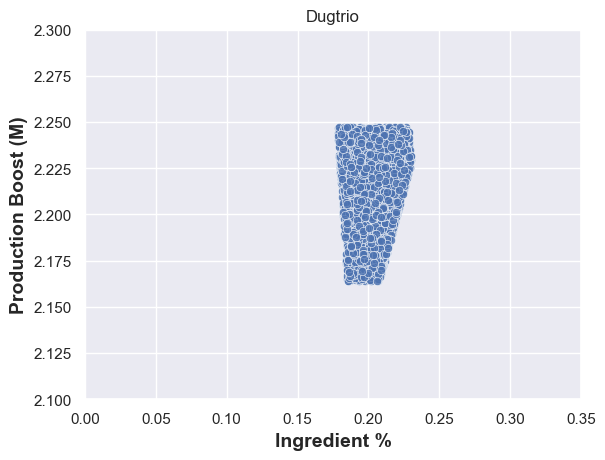

,ingredient%,energy_m
count,9279.000000,9279.000000
mean,0.152142,2.202803
std,0.033139,0.024154
min,0.080110,2.163888
25%,0.124373,2.181262
50%,0.152940,2.201576
75%,0.180432,2.223229
max,0.211803,2.247483


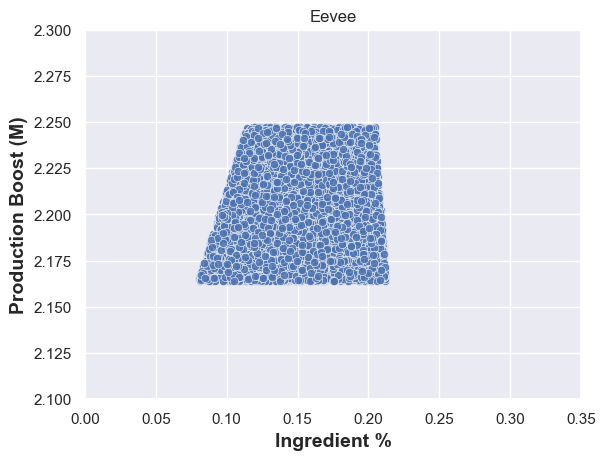

,ingredient%,energy_m
count,5312.000000,5312.000000
mean,0.164489,2.201329
std,0.019451,0.023765
min,0.120179,2.163888
25%,0.149549,2.180382
50%,0.165111,2.199521
75%,0.180883,2.220908
max,0.200185,2.247477


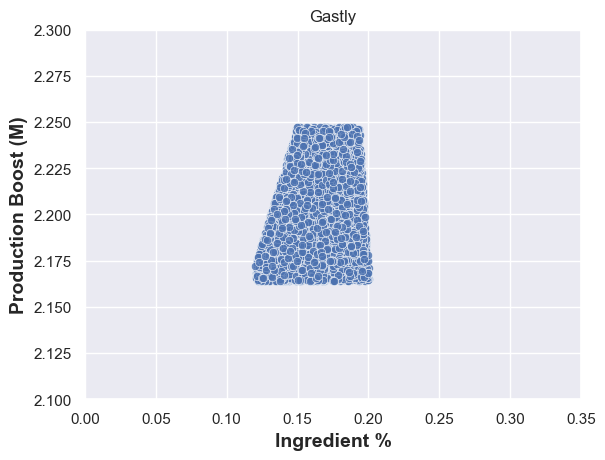

,ingredient%,energy_m
count,9848.000000,9848.000000
mean,0.238156,2.205655
std,0.033988,0.024165
min,0.176906,2.163876
25%,0.208628,2.184493
50%,0.238350,2.206016
75%,0.267321,2.226251
max,0.302711,2.247483


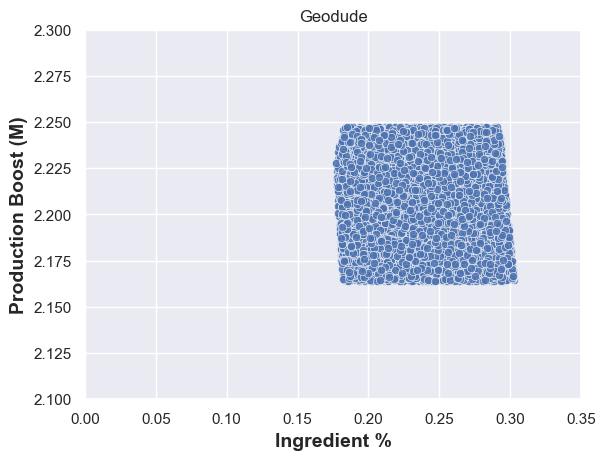

,ingredient%,energy_m
count,9387.000000,9387.000000
mean,0.217702,2.205680
std,0.033513,0.024278
min,0.147196,2.163876
25%,0.190203,2.184390
50%,0.217615,2.205949
75%,0.245996,2.226465
max,0.285795,2.247483


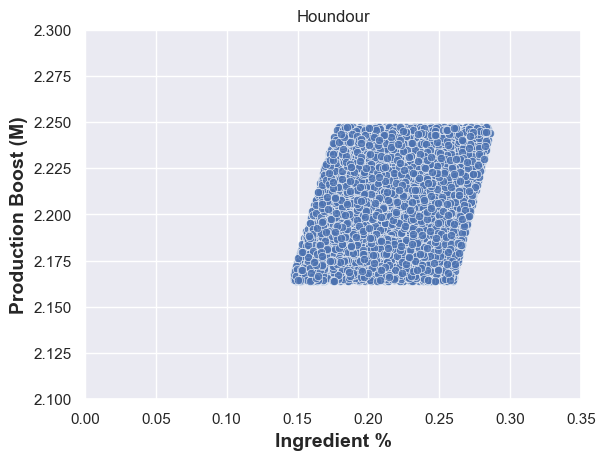

,ingredient%,energy_m
count,781.000000,781.000000
mean,0.249537,2.205770
std,0.005590,0.018439
min,0.238776,2.163876
25%,0.244991,2.191201
50%,0.249373,2.206493
75%,0.254296,2.220230
max,0.260289,2.246617


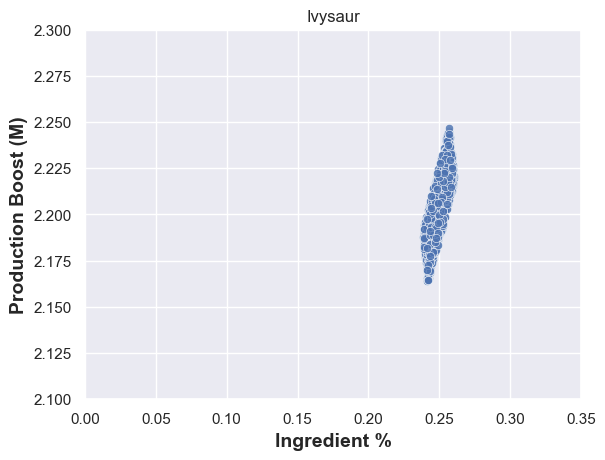

,ingredient%,energy_m
count,8323.000000,8323.000000
mean,0.198957,2.205644
std,0.028796,0.024270
min,0.146664,2.163876
25%,0.173922,2.184288
50%,0.198996,2.206001
75%,0.223852,2.226596
max,0.253553,2.247483


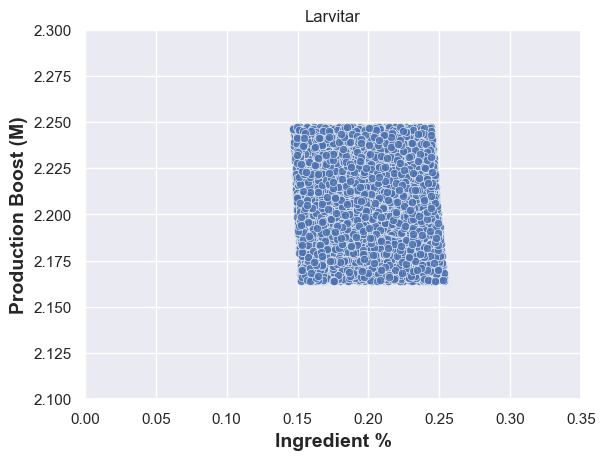

,ingredient%,energy_m
count,6618.000000,6618.000000
mean,0.216586,2.203464
std,0.023858,0.023931
min,0.162477,2.163876
25%,0.197064,2.182451
50%,0.217011,2.202523
75%,0.236997,2.223532
max,0.260690,2.247483


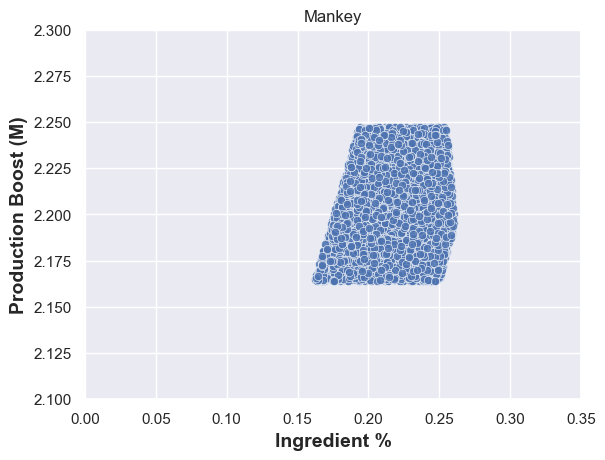

,ingredient%,energy_m
count,2841.000000,2841.000000
mean,0.252259,2.198150
std,0.011679,0.023007
min,0.221411,2.163876
25%,0.243989,2.178227
50%,0.253462,2.194894
75%,0.261693,2.216858
max,0.274552,2.247423


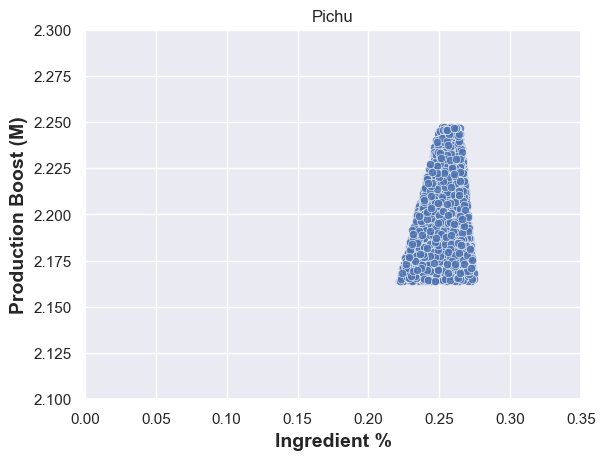

,ingredient%,energy_m
count,1666.000000,1666.000000
mean,0.237266,2.193287
std,0.008284,0.020884
min,0.214563,2.163876
25%,0.231380,2.175346
50%,0.238584,2.189710
75%,0.243761,2.207784
max,0.253553,2.247483


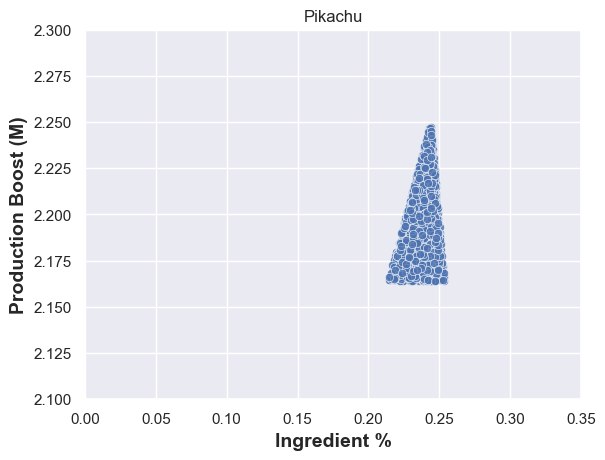

,ingredient%,energy_m
count,3157.000000,3157.000000
mean,0.229915,2.208233
std,0.012933,0.023607
min,0.204342,2.163888
25%,0.219809,2.188657
50%,0.229399,2.209617
75%,0.239334,2.228983
max,0.261745,2.247483


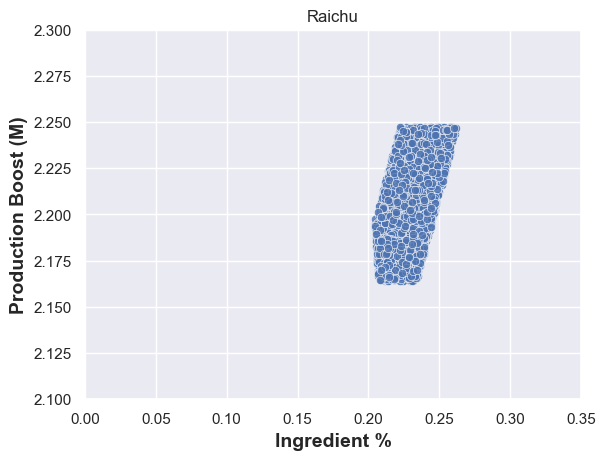

,ingredient%,energy_m
count,10611.000000,10611.000000
mean,0.151140,2.207474
std,0.037416,0.024193
min,0.086004,2.163888
25%,0.118730,2.186652
50%,0.151345,2.208407
75%,0.182562,2.228801
max,0.227258,2.247483


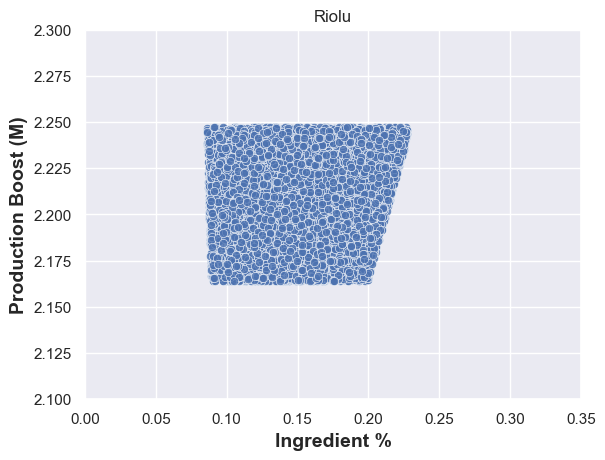

,ingredient%,energy_m
count,7380.000000,7380.000000
mean,0.279886,2.206207
std,0.025635,0.024253
min,0.231991,2.163876
25%,0.258262,2.185158
50%,0.279711,2.206666
75%,0.302150,2.227051
max,0.329005,2.247483


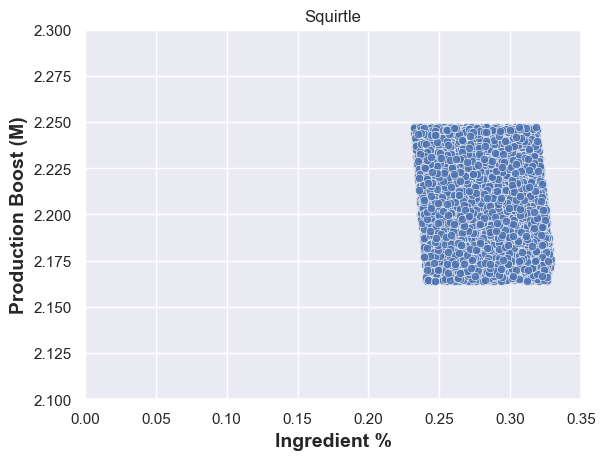

,ingredient%,energy_m
count,4866.000000,4866.000000
mean,0.299643,2.206550
std,0.017223,0.024028
min,0.265756,2.163883
25%,0.284450,2.185621
50%,0.299908,2.207100
75%,0.314174,2.227045
max,0.332991,2.247457


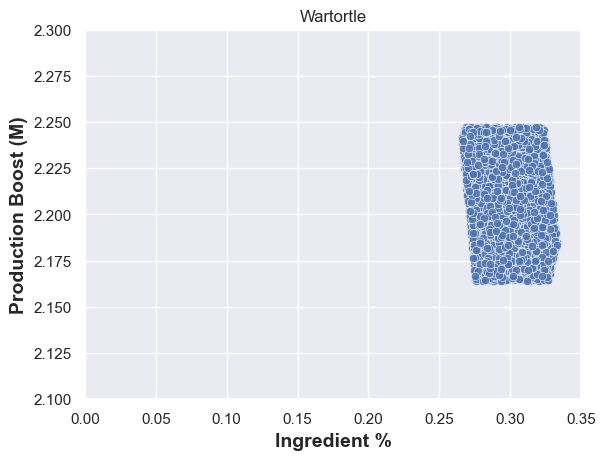

,ingredient%,energy_m
count,7886.000000,7886.000000
mean,0.134652,2.202327
std,0.028468,0.024027
min,0.071498,2.163888
25%,0.110766,2.180982
50%,0.135495,2.200723
75%,0.159283,2.222618
max,0.185451,2.247483


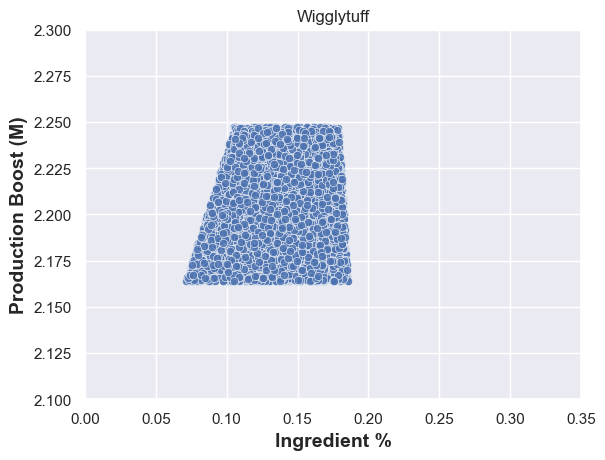

In [10]:
# Display individual Pokémon

all_portraits = []

for col in rnd_trials.columns:
    pts = get_valid_params([col]).copy()
    display(pts.describe())
    plot_group([col],pts)
    pts["group"] = col
    all_portraits.append(pts)



In [11]:
# Save for next sheet.
df = pd.concat(all_portraits)
df.head()
df.to_pickle('./saved/portrait.pickle')



# I tried to plot these on the same graph... terrible idea.

#df = df.sample(int(0.05*len(df.index)))
#fig, ax = plt.subplots()
#sns.scatterplot(data=df,x="ingredient%", y="energy_m",alpha=0.8, hue="group", style="group", ax=ax, linewidth=0) #hue_order=orders
#sns.move_legend(
#    ax, "lower center",
#    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False
#)

    

,ingredient%,energy_m,group
6,0.211569,2.177637,Bellsprout
27,0.206328,2.221183,Bellsprout
42,0.196433,2.227757,Bellsprout
86,0.210999,2.187217,Bellsprout
94,0.228143,2.169374,Bellsprout


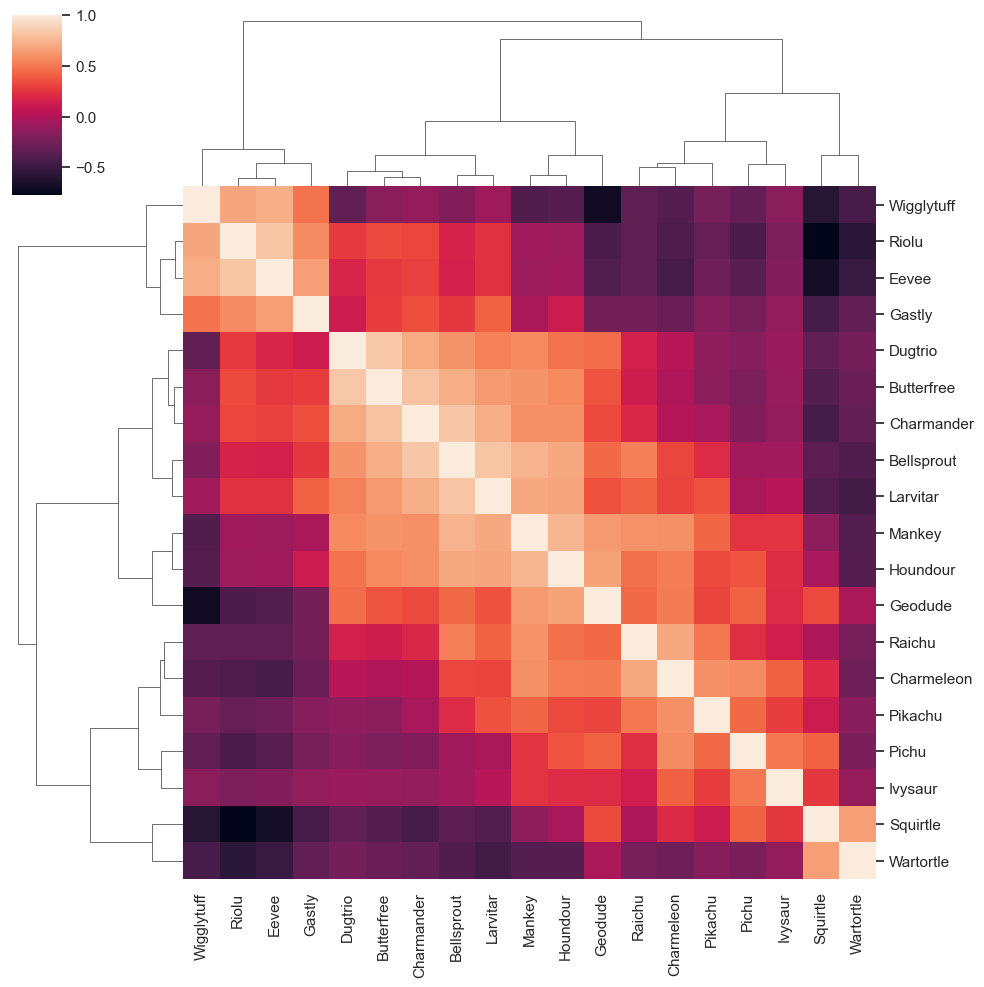

In [12]:
correl = rnd_trials.corr()

from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(correl, method='ward', metric='euclidean', optimal_ordering=True)

clust = sns.clustermap(correl, row_linkage=linkage_matrix, col_linkage=linkage_matrix)

In [13]:
def merge_ratio(a, b):
    
    # Count non zero before merge: a
    df = rnd_trials[a].copy()
    df = df.loc[(df!=0).all(axis=1)]
    size1 = len(df.index);
    
    # Count non zero before merge: b
    df = rnd_trials[b].copy()
    df = df.loc[(df!=0).all(axis=1)]
    size2 = len(df.index);
     
    if(size1==0 or size2==0): return 0;
    before = max(size1,size2)
    
    # Count non zero after merge
    df = rnd_trials[a + b].copy()
    df = df.loc[(df!=0).all(axis=1)]
    after = len(df.index);
       
    return after / before
    

In [14]:
# Here we keep merging into bigger cluster 
# while keeping intersection(a,b) above some fraction of max(a,b)

tresh = 0.15

n = len(correl.index)

output =  [None] * (2*n-1)

for i in range(0,n):
    output[i] = [correl.index[i]]

for i in range(0,n-1):
    
    a = int(linkage_matrix[i,0])   
    b = int(linkage_matrix[i,1])
    
    if output[a] == None or output[b] == None:
        output[n+i] = None
        continue

    if( merge_ratio(output[a], output[b]) > tresh):
        output[n+i] = output[a] + output[b]
        output[a] = None
        output[b] = None
        
    else:
        output[n+i] = None
    
output = list(filter(lambda x: x != None, output))

,ingredient%,energy_m
count,781.000000,781.000000
mean,0.249537,2.205770
std,0.005590,0.018439
min,0.238776,2.163876
25%,0.244991,2.191201
50%,0.249373,2.206493
75%,0.254296,2.220230
max,0.260289,2.246617


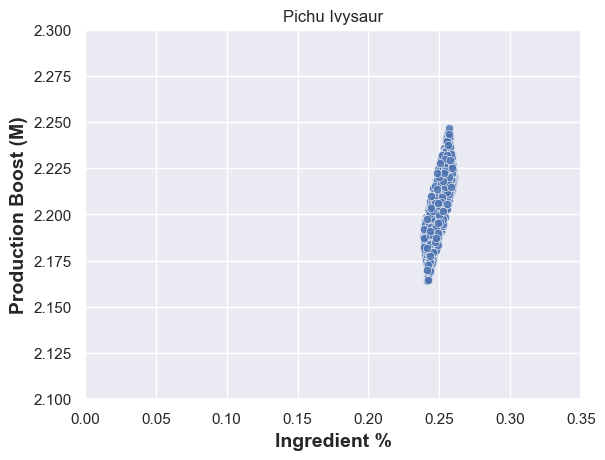

,ingredient%,energy_m
count,1237.000000,1237.000000
mean,0.235006,2.198743
std,0.007232,0.020894
min,0.217784,2.163888
25%,0.229680,2.180934
50%,0.235664,2.198395
75%,0.240850,2.214450
max,0.248002,2.247483


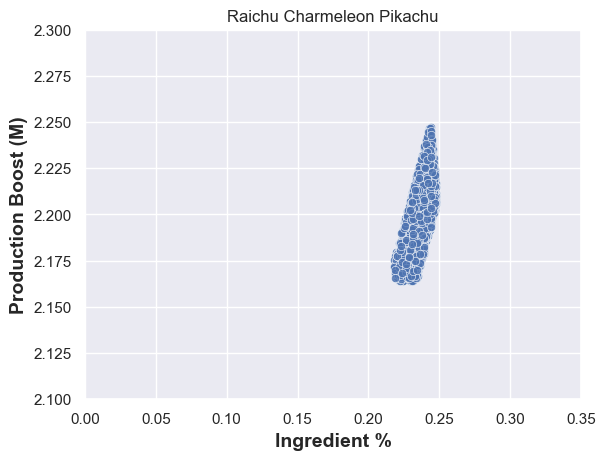

,ingredient%,energy_m
count,4465.000000,4465.000000
mean,0.297251,2.206096
std,0.015903,0.024226
min,0.265756,2.163883
25%,0.283466,2.184984
50%,0.297339,2.206382
75%,0.310849,2.226702
max,0.329005,2.247457


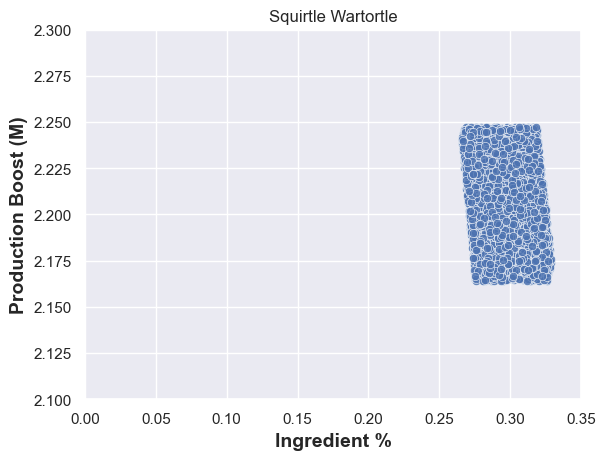

,ingredient%,energy_m
count,4125.000000,4125.000000
mean,0.157198,2.200083
std,0.015589,0.023525
min,0.120179,2.163888
25%,0.145482,2.179457
50%,0.158300,2.197934
75%,0.170043,2.219248
max,0.185451,2.247477


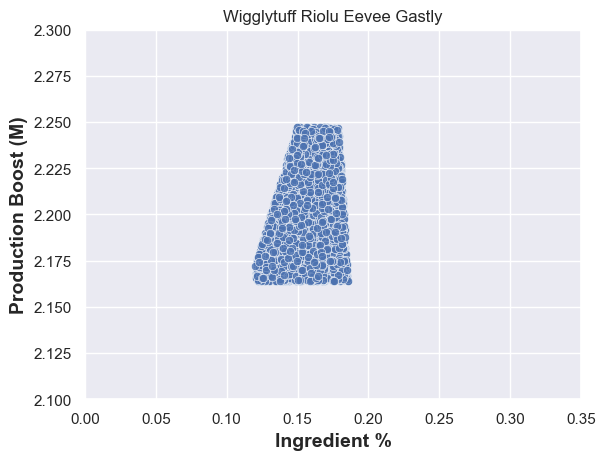

,ingredient%,energy_m
count,2963.000000,2963.000000
mean,0.202860,2.208297
std,0.011136,0.022789
min,0.181464,2.163898
25%,0.193686,2.189913
50%,0.202403,2.209720
75%,0.211520,2.226872
max,0.226316,2.247452


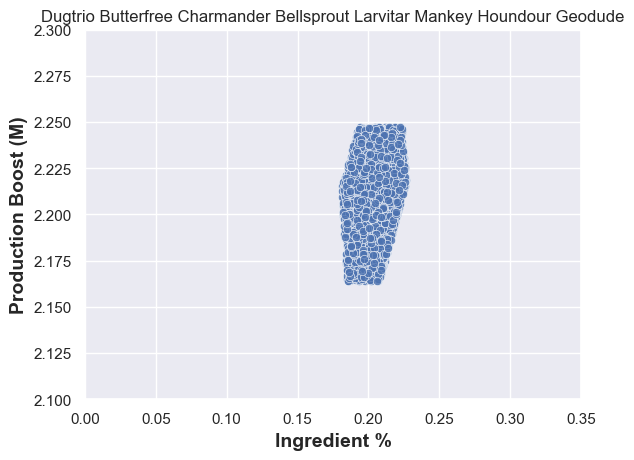

In [15]:

allpts = []

for group in output:
    pts = get_valid_params(group).copy()
    display(pts.describe())
    plot_group(group, pts)
    pts["group"] = " ".join(group)
    allpts.append(pts)

<Axes: xlabel='ingredient%', ylabel='energy_m'>

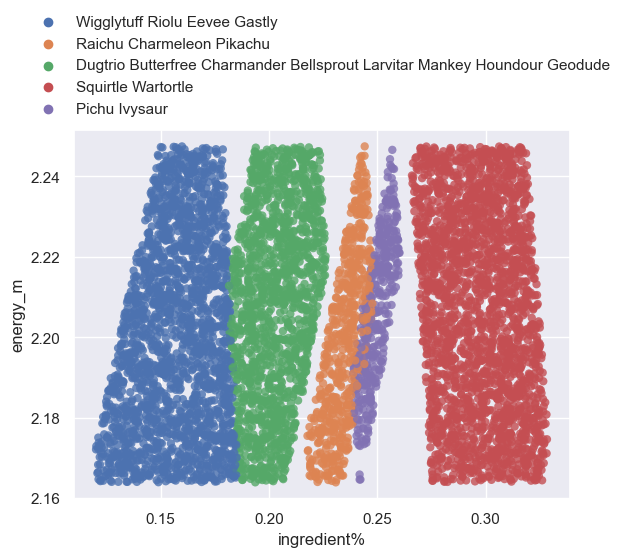

In [16]:
allpts = sorted(allpts, key=lambda x: len(x.index)) 

df = pd.concat(allpts)
df = df.sample(int(0.5*len(df.index)))

fig, ax = plt.subplots()
sns.scatterplot(data=df,x="ingredient%", y="energy_m",alpha=0.8, hue="group", ax=ax, linewidth=0) #hue_order=orders
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=1, title=None, frameon=False,
)

fig.savefig('clusters.png', transparent=False, bbox_inches='tight')